In [1]:
#using sklearn for classfication
#binary classifier

In [ ]:
#라이브러리 & 데이터 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Data 분석

In [4]:
df = pd.read_csv('../../dataset/exercise1.csv')
df.head() # 6 column feature | 1 class

,a1,a2,a3,a4,a5,a6,target
0,24,0.29,700,0.013,100,1.4,0
1,44,0.47,400,0.012,20,0.6,0
2,13,0.21,1000,0.045,40,1.7,0
3,8,0.25,400,0.008,60,0.8,0
4,38,0.15,700,0.044,40,1.2,0


In [6]:
df.shape

(1000, 7)

In [11]:
df['target'].unique() #중복 제거가 된 값 표시 -> 0과 1로 이루어진 것을 확인할 수 있다.

array([0, 1])

In [13]:
df['target'].value_counts() # data가 한 쪽으로 기울지 않음을 확인

0    588
1    412
Name: target, dtype: int64

In [14]:
#데이터 탐색 및 데이터 시각화
df.describe()

,a1,a2,a3,a4,a5,a6,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.821000,0.283240,821.300000,0.027491,117.180000,1.712600,0.412000
std,10.502631,0.103347,254.560624,0.010786,45.428089,0.707079,0.492441
min,5.000000,0.050000,300.000000,0.005000,20.000000,0.200000,0.000000
25%,25.000000,0.240000,700.000000,0.021000,90.000000,1.300000,0.000000
50%,29.000000,0.290000,900.000000,0.027000,120.000000,1.800000,0.000000
75%,35.000000,0.340000,1000.000000,0.034000,150.000000,2.300000,1.000000
max,50.000000,0.500000,1200.000000,0.050000,200.000000,2.900000,1.000000


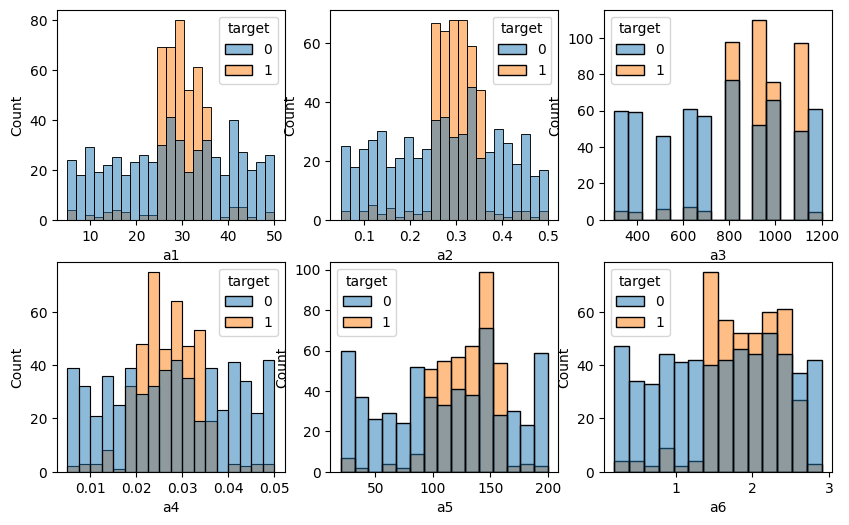

In [15]:
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows = nrows, ncols = ncols)
fig.set_size_inches(10,6)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j
        sns.histplot(x=df.columns[attr], 
                     data = df, 
                     ax = axs[i][j], 
                     hue = 'target') # target column으로 구분 

# implementation

## Decision Tree

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [44]:
X = df.iloc[:, :6]
y = df['target']

#stratify : 전체 category(y)에 대해서 균일하게 나눠지도록 setting  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23, stratify = y)

model = DecisionTreeClassifier(random_state = 23)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.825

## RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier(random_state = 23)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.905

## Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
model = GradientBoostingClassifier(random_state = 23)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

## XGBoost

In [27]:
from xgboost import XGBClassifier

In [28]:
model = XGBClassifier(random_state = 23)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.89

## SVC

In [41]:
from sklearn.svm import SVC

In [46]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.765

In [39]:
#성능을 끌어올리기 위해, data pre-precessing을 해준다. 즉, scaling
from sklearn.preprocessing import StandardScaler
#Train과 test로 dataset을 나누기 때문에, data를 먼저 변환한 후에 data를 나눠준다. 

In [40]:
sc = StandardScaler()
X_scale = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 23, stratify = y)


model = SVC(random_state = 23)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.895